# COVID-19 ANALYSIS IN AFRICA

### import the necessary libraries

In [19]:
from dash import Dash, html, dcc, Input,Output, dash_table, callback
import pandas as pd
import plotly.express as px

### Load the dataset

In [2]:
covid = pd.read_csv('covid_africa.csv')
covid.head()

,Country,Country Code,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Deaths/1 mil population,Total Tests,Tests/1 mil population,Population
0,Algeria,DZA,206995,5939,142049.0,59007.0,4609,132,230861.0,5140.0,44913918
1,Angola,AGO,64612,1719,57493.0,5400.0,1887,50,1092363.0,31907.0,34236049
2,Benin,BEN,24804,161,24346.0,297.0,1977,13,604310.0,48156.0,12548939
3,Botswana,BWA,192935,2407,188000.0,2528.0,79879,997,1828618.0,757085.0,2415342
4,Burkina Faso,BFA,15103,221,14661.0,221.0,697,10,226312.0,10443.0,21671636


In [3]:
covid.shape

(54, 11)

### Check for columns with null values

In [4]:
covid.isnull().sum()

Country                         0
Country Code                    0
Total Cases                     0
Total Deaths                    0
Total Recovered                 1
Active Cases                    1
Total Cases/1 mil population    0
Deaths/1 mil population         0
Total Tests                     2
Tests/1 mil population          2
Population                      0
dtype: int64

In [5]:
covid[covid.isnull().any(axis=1)]

,Country,Country Code,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Deaths/1 mil population,Total Tests,Tests/1 mil population,Population
10,Comoros,COM,4307,147,4093.0,67.0,4815,164,NaN,NaN,894454
48,Tanzania,TZA,26196,725,NaN,NaN,422,12,NaN,NaN,62014670


###  At the time of data collation, there were no records for missing values in 'Comoros' and 'Tanzania'. Therefor the missing values can be replaced by zero.

In [6]:
covid=covid.fillna(0)

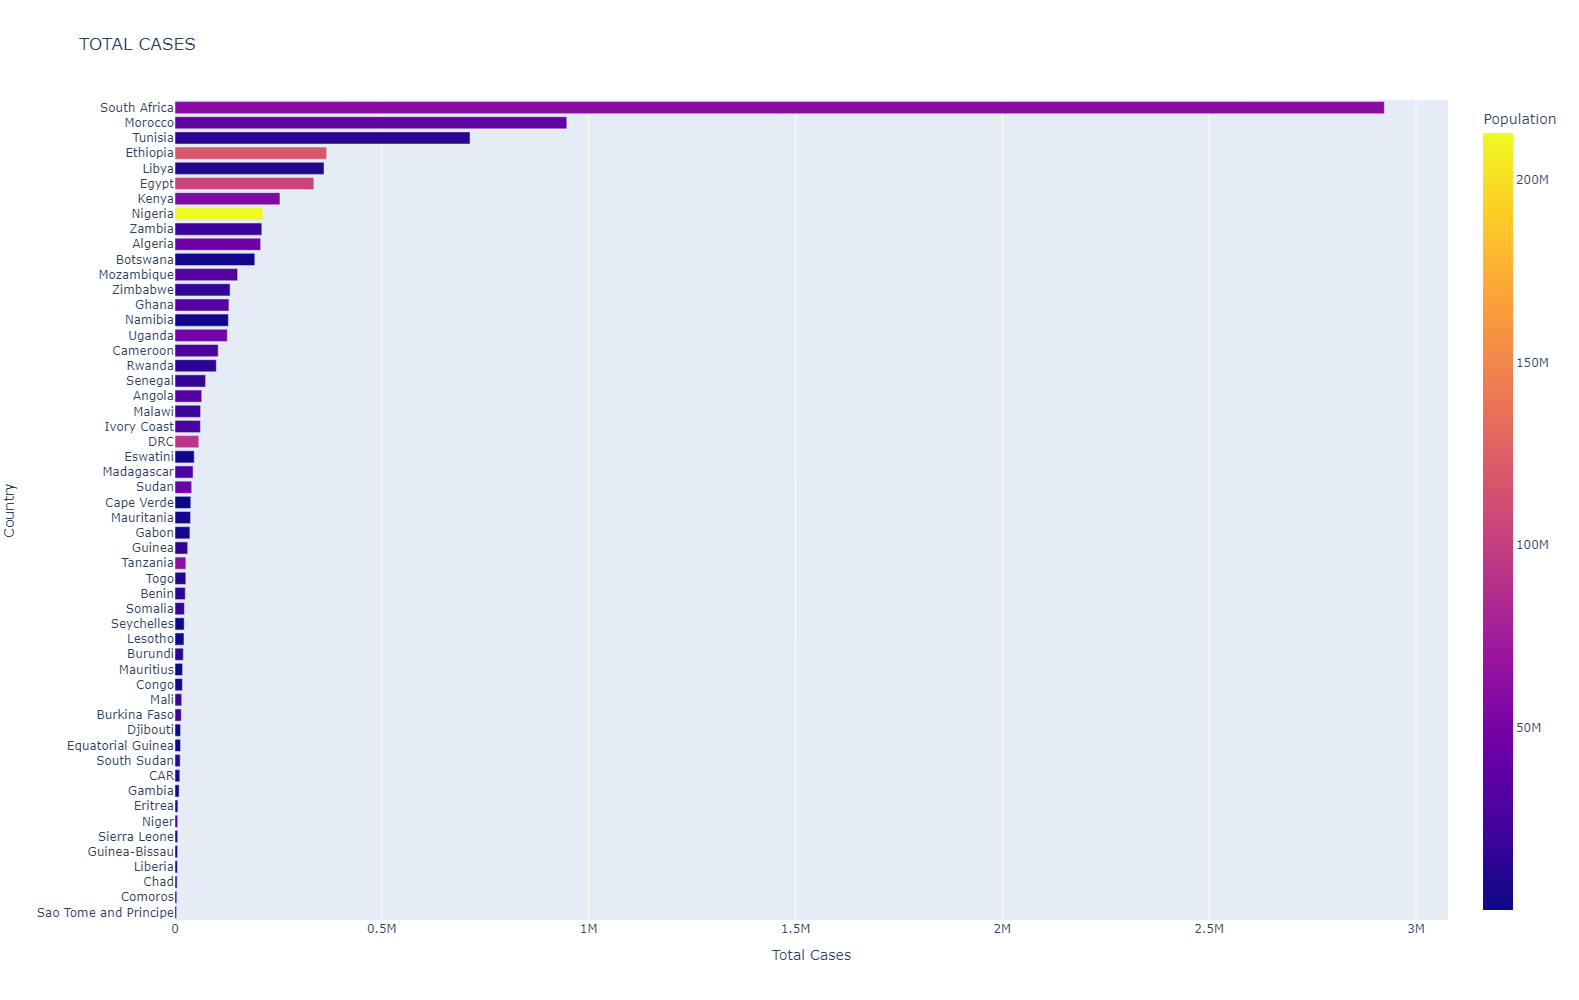

In [24]:
fig2 = px.bar(covid.sort_values('Total Cases'),x='Total Cases',y='Country',orientation='h',height=1000,color='Population',title='TOTAL CASES')
fig2.show()

In [18]:
features=[{'label':'Total Cases...','value' : 'Total Cases'},
           {'label':'Total Deaths...', 'value' : 'Total Deaths'},
           {'label':'Total Recovered...', 'value' : 'Total Recovered'},
           {'label' : 'Active Cases', 'value' : 'Active Cases'}
           ]
app = Dash(__name__)
app.layout = html.Div([
html.H1("COVID ANALYSIS IN AFRICA",
        style={'color': 'blue','fontSize': '40px','text-align':'center'}),
dcc.RadioItems(options=features,value='Total Cases',id='radio',inline=True),
dcc.Graph(figure={},id='my_graph'),
html.Br()
])

@app.callback(
    Output(component_id='my_graph',component_property='figure'),
    Input(component_id='radio',component_property='value')
)
def draw_graph(sel):
    figg=px.choropleth(covid, locations='Country Code', color=sel, hover_name='Country',
                    projection='natural earth',scope='africa',
                   width=800,height=800)
    return figg

if __name__=='__main__':
    app.run_server()